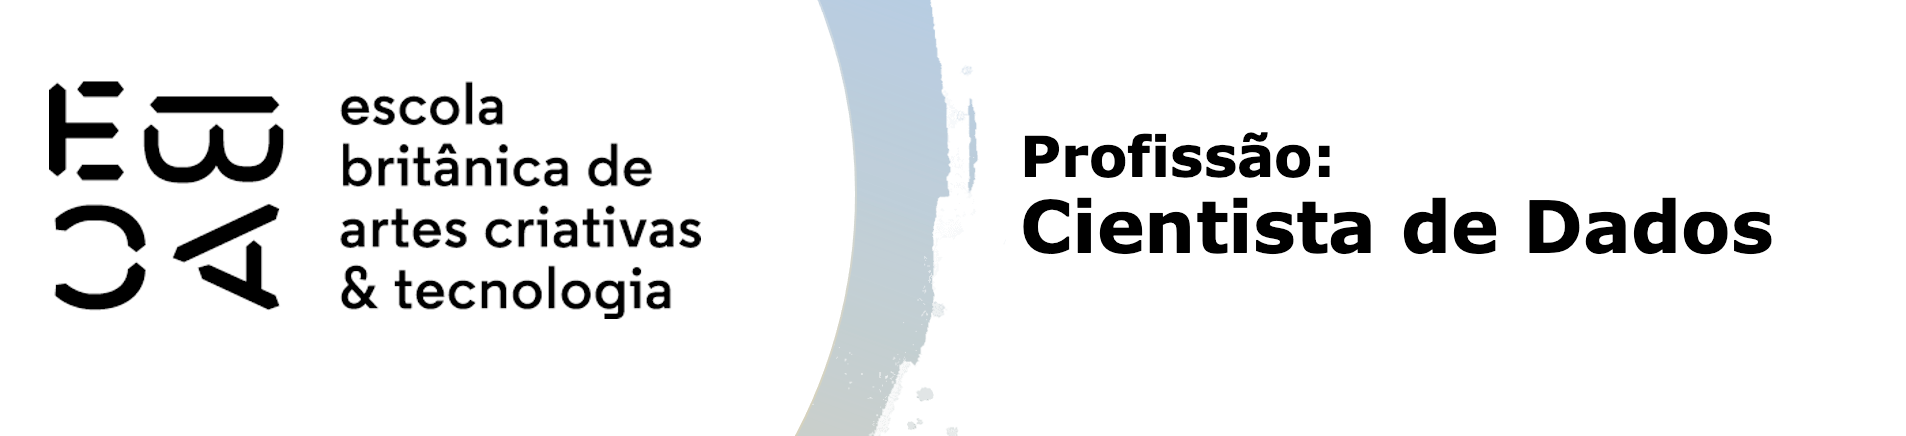

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelo de previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

## Preparação dos Dados

Vamos carregar os dados e realizar algumas transformações iniciais.

### Carregamento dos Dados

Começamos importando as bibliotecas necessárias e carregando o conjunto de dados 'previsao_de_renda_II.csv' em um DataFrame.

In [11]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Carregamento dos dados
df = pd.read_csv('previsao_de_renda_II.csv')

# Visualização das primeiras linhas dos dados
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


### Realizando o tratamento de dados

In [12]:
# Verificando valores ausentes
print("Quantidade de Valores Ausentes por Coluna:")
missing_values = df.isnull().sum()
print(missing_values)

Quantidade de Valores Ausentes por Coluna:
data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64


In [13]:
# Preenchendo valores ausentes pela média
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [14]:
# Verificando se ainda existem valores ausentes
print(df.isnull().sum())

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [15]:
# Codificando as variáveis categóricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

### Dividindo os dados em treino e teste

In [16]:
# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df_encoded.drop(columns=['index', 'data_ref', 'renda'])
y = np.log(df_encoded['renda'])  # Aplicando a transformação logarítmica na variável renda

# Dividindo os dados em conjuntos de treinamento e teste
# A função train_test_split divide o conjunto de dados em X_train, X_test, y_train e y_test
# O argumento test_size define a proporção dos dados que será usado como conjunto de teste (20% neste caso)
# O argumento random_state garante que a divisão seja reproduzível
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treinando o modelo

In [17]:
# Inicializando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

LinearRegression()

### Avaliando o desempenho do modelo da base de treino e da base de testes

In [18]:
# Fazendo previsões com o modelo
y_pred = model.predict(X_test)

In [19]:
# Calculando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)

# Calculando o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

print(f"Erro Médio Quadrático (MSE): {mse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Médio Quadrático (MSE): 1.0025
Coeficiente de Determinação (R²): 0.3930


### Executando random forest para comparar o melhor modelo

In [20]:
# Inicializando o modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Treinando o modelo com os dados de treinamento
rf_model.fit(X_train, y_train)

# Fazendo previsões na base de teste
rf_y_pred = rf_model.predict(X_test)

# Calculando o erro médio quadrático (MSE)
rf_mse = mean_squared_error(y_test, rf_y_pred)

# Calculando o coeficiente de determinação (R²)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Erro Médio Quadrático (MSE) - Random Forest: {rf_mse:.4f}")
print(f"Coeficiente de Determinação (R²) - Random Forest: {rf_r2:.4f}")

Erro Médio Quadrático (MSE) - Random Forest: 0.8018
Coeficiente de Determinação (R²) - Random Forest: 0.5145


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

### Verifique se os resíduos possuem distribuição Normal (ou algo próximo):

Os resíduos não têm uma distribuição normal (p <= 0.05)


/Users/hitss/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Axes: xlabel='renda', ylabel='Count'>

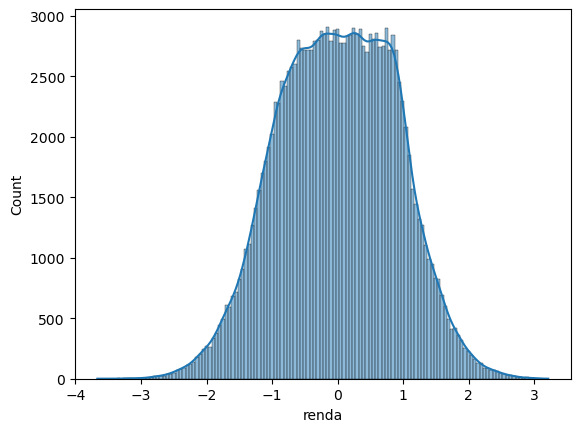

In [21]:
# Calculando os resíduos
residuos_rf = y_test - rf_y_pred

# Verificando a normalidade dos resíduos usando o teste de Shapiro-Wilk
shapiro_test_statistic, shapiro_p_value = shapiro(residuos_rf)
if shapiro_p_value > 0.05:
    print("Os resíduos têm uma distribuição aproximadamente normal (p > 0.05)")
else:
    print("Os resíduos não têm uma distribuição normal (p <= 0.05)")

# Plote um gráfico de distribuição dos resíduos
sns.histplot(residuos_rf, kde=True)

### Verificando a independência dos resíduos

Text(0.5, 1.0, 'Gráfico de Resíduos versus Valores Preditos')

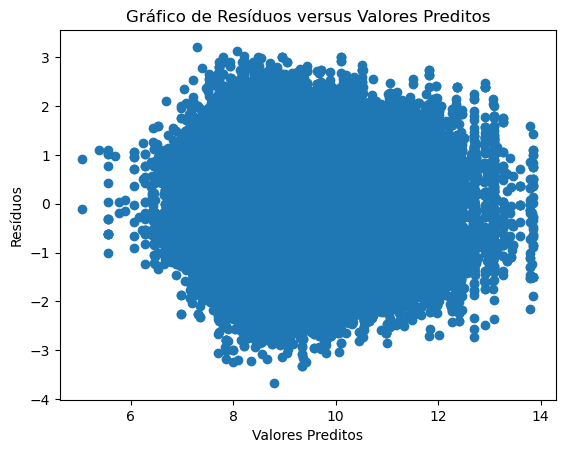

In [22]:
# Plotando um gráfico de resíduos vs. valores preditos
plt.scatter(rf_y_pred, residuos_rf)
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos versus Valores Preditos")

### Realizando um gráfico dos resíduos vs. cada uma das variáveis do modelo

Text(0.5, 1.0, 'Gráfico de Resíduos versus Idade')

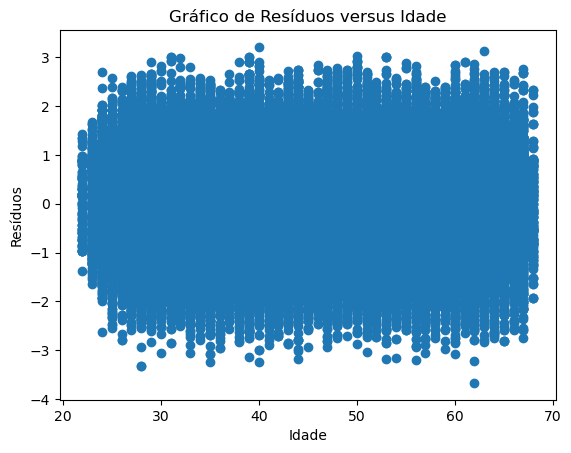

In [23]:
# Gerando gráfico de dispersão dos resíduos em relação à variável 'idade'
plt.scatter(X_test['idade'], residuos_rf)
plt.xlabel("Idade")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos versus Idade")

### Repetindo esse código para cada variável independente

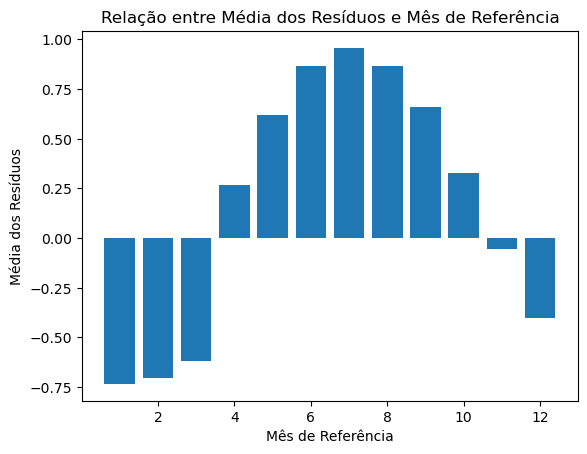

In [24]:
# Convertendo a coluna 'data_ref' para datetime para análise de resíduos mensais
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Calculando os resíduos do modelo Random Forest
residuos = y_test - rf_y_pred

# Agrupando os resíduos pela variável de mês de referência
media_residuos_por_mes = residuos.groupby(df['data_ref'].dt.month).mean()

# Plotando um gráfico de barras da média dos resíduos por mês
plt.bar(media_residuos_por_mes.index, media_residuos_por_mes)
plt.xlabel("Mês de Referência")
plt.ylabel("Média dos Resíduos")
plt.title("Relação entre Média dos Resíduos e Mês de Referência")
plt.show()

### Avalie se a variância da variável resposta parece ser conforme os valores previstos

Text(0.5, 1.0, 'Relação entre Valores Previstos e Resíduos ao Quadrado')

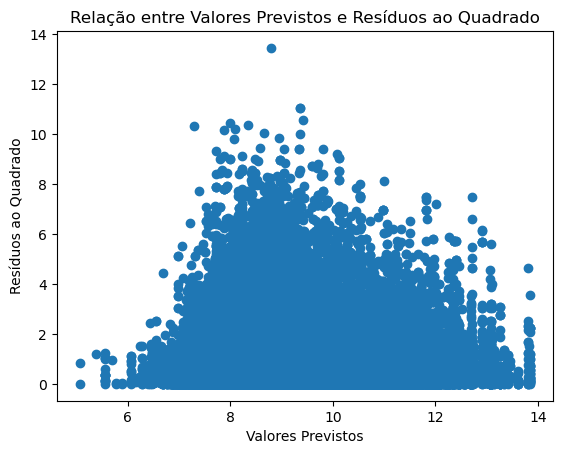

In [25]:
# Gráfico de dispersão para avaliar a variância da variável resposta em relação aos resíduos ao quadrado
plt.scatter(rf_y_pred, residuos_rf**2)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos ao Quadrado")
plt.title("Relação entre Valores Previstos e Resíduos ao Quadrado")

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

### Avaliando os studentized residuals

In [26]:
# Identificação de Outliers usando Resíduos Studentizados
X = residuos_rf
y = rf_y_pred

# Adicionando um intercepto ao modelo
X = sm.add_constant(X)

# Ajustando um modelo de regressão linear
model = sm.OLS(y, X).fit()

# Obtendo os resíduos studentizados
residuos_studentizados = model.get_influence().resid_studentized_internal

# Identificando outliers com base em resíduos studentizados
outliers = np.where(np.abs(residuos_studentizados) > 2)[0]
print("Índices dos outliers:", outliers)

Índices dos outliers: [     1     22     36 ... 149971 149978 149993]


### Verificando se existem pontos influentes

In [27]:
# Calculando a influência dos pontos no modelo de regressão
influence = model.get_influence()

# Calculando a Distância de Cook, que mede o efeito de remover um ponto de dados no modelo
cooks_distance = influence.cooks_distance[0]

# Identificando pontos influentes com base na Distância de Cook
n = len(y)  # Número de observações
limite_cook = 4 / n  # Definindo um limite para a Distância de Cook
influencia_por_cook = np.where(cooks_distance > limite_cook)[0]
print("Índices dos pontos influentes (Distância de Cook):", influencia_por_cook)

# Calculando a alavancagem (leverage) de cada ponto no modelo
leverage = influence.hat_matrix_diag

# Identificando pontos com alta alavancagem
p = X.shape[1] - 1  # Número de preditores no modelo
limite_leverage = 2 * (p + 1) / n  # Definindo um limite para alta alavancagem
alta_leverage = np.where(leverage > limite_leverage)[0]
print("Índices dos pontos com alta alavancagem:", alta_leverage)

Índices dos pontos influentes (Distância de Cook): [     1     22     35 ... 149971 149978 149993]
Índices dos pontos com alta alavancagem: [    21     54     59 ... 149979 149982 149992]


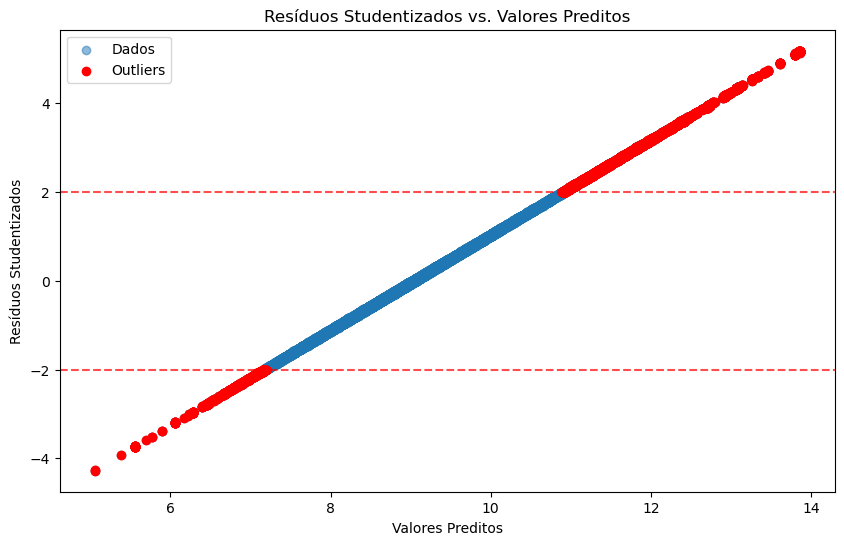

In [28]:
# Plotando resíduos studentizados
plt.figure(figsize=(10, 6))

# Scatter plot dos resíduos studentizados
plt.scatter(rf_y_pred, residuos_studentizados, alpha=0.5, label='Dados')

# Destacando os outliers em vermelho
plt.scatter(rf_y_pred[outliers], residuos_studentizados[outliers], color='red', label='Outliers')

# Linhas de referência para identificação de outliers
plt.axhline(y=2, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=-2, color='r', linestyle='--', alpha=0.7)

# Configurando título e rótulos dos eixos
plt.title("Resíduos Studentizados vs. Valores Preditos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos Studentizados")

# Adicionando legenda ao gráfico
plt.legend()

# Exibindo o gráfico
plt.show()

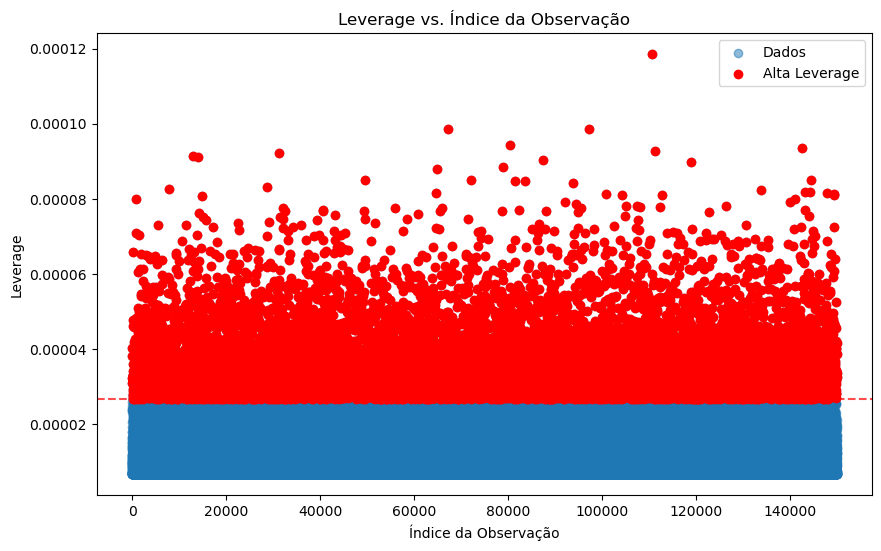

In [29]:
# Criando uma figura com o tamanho especificado
plt.figure(figsize=(10, 6))

# Scatter plot do leverage em relação ao índice das observações
plt.scatter(range(len(leverage)), leverage, alpha=0.5, label='Dados')

# Destacando pontos com alta leverage em vermelho
plt.scatter(alta_leverage, leverage[alta_leverage], color='red', label='Alta Leverage')

# Linha de referência para identificação de alta leverage
plt.axhline(y=2*(p+1)/n, color='r', linestyle='--', alpha=0.7)

# Configurando o título e rótulos dos eixos
plt.title("Leverage vs. Índice da Observação")
plt.xlabel("Índice da Observação")
plt.ylabel("Leverage")

# Adicionando legenda ao gráfico
plt.legend()

# Exibindo o gráfico
plt.show()

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [30]:
# Selecionando apenas as colunas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação de Spearman
correlation_matrix_spearman = df_numeric.corr(method='spearman')

print(correlation_matrix_spearman)

                          index  qtd_filhos     idade  tempo_emprego  \
index                  1.000000    0.028806 -0.046462      -0.030095   
qtd_filhos             0.028806    1.000000 -0.415151      -0.089260   
idade                 -0.046462   -0.415151  1.000000       0.300547   
tempo_emprego         -0.030095   -0.089260  0.300547       1.000000   
qt_pessoas_residencia  0.031365    0.828600 -0.350006      -0.058139   
renda                 -0.018925   -0.019957  0.107999       0.501354   

                       qt_pessoas_residencia     renda  
index                               0.031365 -0.018925  
qtd_filhos                          0.828600 -0.019957  
idade                              -0.350006  0.107999  
tempo_emprego                      -0.058139  0.501354  
qt_pessoas_residencia               1.000000 -0.008260  
renda                              -0.008260  1.000000  


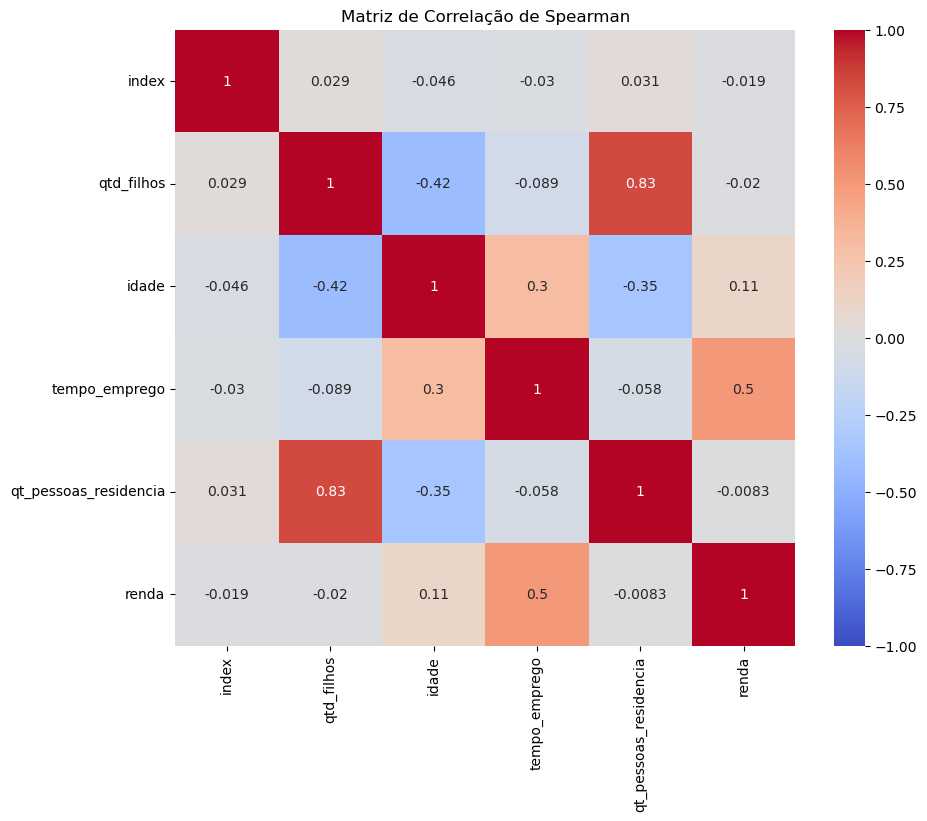

In [31]:
# Definindo o tamanho da figura do gráfico
plt.figure(figsize=(10, 8))

# Cria um heatmap da matriz de correlação de Spearman
# - correlation_matrix_spearman: A matriz de correlação que será plotada
# - annot=True: Mostra os valores da correlação nas células do heatmap
# - cmap='coolwarm': Escolhe a paleta de cores para o heatmap (tons de azul e vermelho)
# - vmin=-1, vmax=1: Define os valores mínimo e máximo para a escala de cores
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Definndo o título do gráfico
plt.title('Matriz de Correlação de Spearman')

# Exibindo o gráfico
plt.show()

**Análise**

**qtd_filhos e qt_pessoas_residencia** têm uma correlação de 0.828600, indicando uma relação positiva e forte. Ou seja, conforme a quantidade de filhos aumenta, a quantidade de pessoas na residência também tende a aumentar.

**idade e tempo_emprego** têm uma correlação de 0.300547, indicando uma relação positiva e moderada. Conforme a idade do indivíduo aumenta, o tempo de emprego também tende a aumentar.

**idade e qtd_filhos** têm uma correlação de -0.415151, sugerindo uma relação negativa. Conforme a idade do indivíduo aumenta, a quantidade de filhos tende a diminuir. Isso pode ser interpretado como pessoas mais jovens tendo mais filhos em comparação com pessoas mais velhas no seu dataset.


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [32]:
# Transformando a variável 'renda' usando uma transformação logarítmica e armazenando-a em 'renda_log'
df['renda_log'] = np.log(df['renda'])

# Recriando os conjuntos de treinamento e teste com a nova variável 'renda_log':
# - X: Conjunto de variáveis independentes, excluindo colunas irrelevantes ('index', 'data_ref', 'renda')
# - y: Conjunto da variável dependente, agora usando a nova variável transformada 'renda_log'
X = df_encoded.drop(columns=['index', 'data_ref', 'renda'])
y = df['renda_log']

# Dividindo os dados em conjuntos de treinamento e teste
# - test_size=0.2: Define que 20% dos dados serão usados como conjunto de teste
# - random_state=42: Define uma semente para a aleatoriedade, garantindo resultados reproduzíveis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Calculndo os escores Z para os valores da variável 'y_train'
z_scores = np.abs(stats.zscore(y_train))

# Definindo um limite de Z-Score para identificar outliers
# - Valores maiores que 2 ou menores que -2 são considerados outliers
outliers = np.where(z_scores > 2)

# Removendo os outliers do conjunto de treinamento:
# - X_train_no_outliers: Conjunto de variáveis independentes após a remoção de outliers
# - y_train_no_outliers: Conjunto da variável dependente após a remoção de outliers
X_train_no_outliers = X_train[(z_scores <= 2)]
y_train_no_outliers = y_train[(z_scores <= 2)]

### Importando o modelo de regressão linear, random forest e métricas de desempenho

In [37]:
# Inicializando um novo modelo de regressão linear para o conjunto de treinamento sem outliers
model_adjusted = LinearRegression()

# Treinando o modelo com os dados de treinamento sem outliers
model_adjusted.fit(X_train_no_outliers, y_train_no_outliers)

# Fazendo previsões com o modelo ajustado
y_pred_adjusted = model_adjusted.predict(X_test)

# Calculando as métricas de desempenho para o modelo ajustado:
# - MSE (Erro Médio Quadrático): Mede a média dos quadrados dos erros entre os valores previstos e reais
# - R² (Coeficiente de Determinação): Indica a proporção da variabilidade na variável dependente que é explicada pelo modelo
mse_adjusted = mean_squared_error(y_test, y_pred_adjusted)
r2_adjusted = r2_score(y_test, y_pred_adjusted)

# Imprimindo as métricas de desempenho do modelo ajustado
print(f"Erro Médio Quadrático (MSE) - Modelo Ajustado: {mse_adjusted:.4f}")
print(f"Coeficiente de Determinação (R²) - Modelo Ajustado: {r2_adjusted:.4f}")

Erro Médio Quadrático (MSE) - Modelo Ajustado: 1.0232
Coeficiente de Determinação (R²) - Modelo Ajustado: 0.3804


In [38]:
from sklearn.ensemble import RandomForestRegressor  # Importe o RandomForestRegressor

# Inicialize um novo modelo Random Forest
rf_model_adjusted = RandomForestRegressor(random_state=42)

# Treine o modelo com os dados de treinamento sem outliers
rf_model_adjusted.fit(X_train_no_outliers, y_train_no_outliers)

# Faça previsões com o modelo ajustado
rf_y_pred_adjusted = rf_model_adjusted.predict(X_test)

# Calcule as métricas de desempenho para o modelo ajustado com Random Forest:
rf_mse_adjusted = mean_squared_error(y_test, rf_y_pred_adjusted)
rf_r2_adjusted = r2_score(y_test, rf_y_pred_adjusted)

# Imprima as métricas de desempenho do modelo ajustado com Random Forest
print(f"Erro Médio Quadrático (MSE) - Modelo Ajustado com Random Forest: {rf_mse_adjusted:.4f}")
print(f"Coeficiente de Determinação (R²) - Modelo Ajustado com Random Forest: {rf_r2_adjusted:.4f}")

Erro Médio Quadrático (MSE) - Modelo Ajustado com Random Forest: 0.8505
Coeficiente de Determinação (R²) - Modelo Ajustado com Random Forest: 0.4850


# Resumo das Análises dos Modelos: Regressão Linear e Random Forest

### Regressão Linear (antes dos ajustes):

Erro Médio Quadrático (MSE): 1.0025<br>
Coeficiente de Determinação (R²): 0.3930

### Regressão Linear (depois dos ajustes):

Erro Médio Quadrático (MSE) - Modelo Ajustado: 1.0232<br>
Coeficiente de Determinação (R²) - Modelo Ajustado: 0.3804

### Random Forest (antes dos ajustes):

Erro Médio Quadrático (MSE) - Random Forest: 0.8018<br>
Coeficiente de Determinação (R²) - Random Forest: 0.5145

### Regressão Linear (depois dos ajustes) com Random Forest:

Erro Médio Quadrático (MSE) - Modelo Ajustado com Random Forest: 0.8505<br>
Coeficiente de Determinação (R²) - Modelo Ajustado com Random Forest: 0.4850

___

Antes dos ajustes, o modelo de Regressão Linear tinha um MSE de 1.0025 e um R² de 0.3930, indicando que explicava aproximadamente 39% da variabilidade na variável dependente.

Após os ajustes, o desempenho do modelo de Regressão Linear piorou ligeiramente, com um MSE de 1.0232 e um R² de 0.3804.

O modelo de Random Forest, antes dos ajustes, apresentou um desempenho intermediário, com um MSE de 0.8018 e um R² de 0.5145, explicando cerca de 51% da variabilidade.

No entanto, o modelo de Random Forest também foi ajustado, e após o ajuste, o MSE aumentou para 0.8505, enquanto o R² diminuiu para 0.4850.

**Conclusão:**

Com base nas métricas de desempenho, o modelo de Regressão Linear, antes dos ajustes, tinha um desempenho relativamente inferior em comparação com o modelo de Random Forest, que explicava uma proporção maior da variabilidade na variável dependente.

No entanto, após os ajustes, nenhum dos modelos apresentou uma melhoria significativa nas métricas de desempenho. O modelo de Random Forest, mesmo após o ajuste, continuou sendo o modelo com melhor desempenho em termos de MSE e R².

Portanto, o modelo de Random Forest parece ser a melhor escolha entre os modelos avaliados para este conjunto de dados, uma vez que ele demonstrou um desempenho superior tanto antes quanto depois dos ajustes.